# Homework 3 
## Wajih Arfaoui

### Exercise 3 

The **k-fold cross validation** is splitting the dataset into k similar subsets, so you can use **k-1** subsets to train the model and **1** subset to do the validation. You repeat this process **k** times while choosing a different subset each time. Finally you estimate the test error by averaging the **k** MSE estimates.

The validation set approach is easier and simpler than the cross validation approach, while it tends to overestimate the test error rate due to the observations that are included in the training and validation sets /n 

LOOCV is considered as a special cas of k-fold cross-validation where k = the number of observations, so basically it is more complex when it comes to computation since it needs to fit the model n times.

### Exercise 8

In [3]:
library(boot)
set.seed(1)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

n = 100, p = 2.

$Y=X−2X^2+ϵ.$

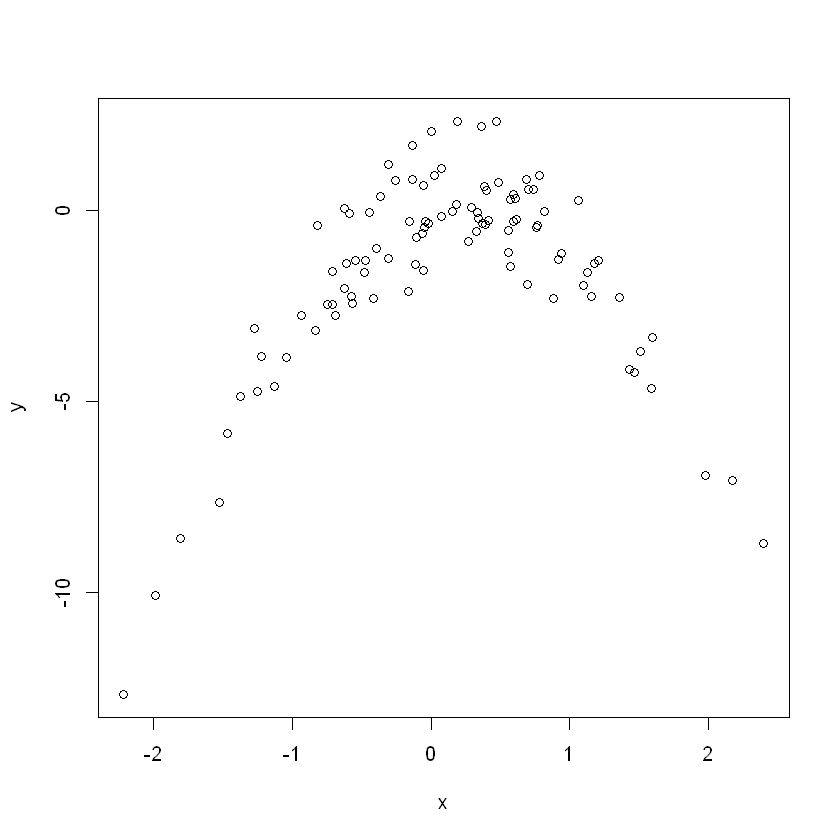

In [4]:
plot(x,y)

The range of **x** is from -2 to 2 while the range of **y** is from -10 to 2

In [7]:
data= data.frame(x,y)
set.seed(1)
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 7.288162 7.284744

In [8]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [9]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [10]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 0.9539049 0.9534453

The quadratic polynomial has the lowest LOOCV test error rate because it represents the original form of **y** 

In [12]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


There is significance for linear and quadratic forms what agree with the LOOCV conclusion

### Exercise 1

Best subset selection has the smallest training RSS because the two other methods depends on the first predictor they picked

It depends, but generally the best subset may have a better test RSS because it considers more models 

TRUE, TRUE, FALSE, FALSE, FALSE

### Exercise 9

In [25]:
library(ISLR)
train.size = (dim(College)[1] / 3)*2
train = sample(1:dim(College)[1], train.size)
College.train = College[train, ]
College.test = College[-train, ]

In [29]:
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)

In [30]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [38]:
grid = 10 ^ seq(10, -2, length=100)
x = model.matrix(Apps~., data=College.train)[,-1]
x_test = model.matrix(Apps~., data=College.test)[,-1]
y_test =College.test[, "Apps"]
y =College.train[, "Apps"]
ridge.mod = glmnet(x,y, alpha=0,lambda=grid,thresh=1e-12)
ridge.pred = predict(ridge.mod,s=19,newx=x_test)
mean((ridge.pred-y_test)^2)

[1] 1012824

In [40]:
mod.lasso = glmnet(x,y, alpha=1,lambda=grid,thresh=1e-12)
lasso.pred = predict(mod.lasso, newx=x_test, s=21)
mean((lasso.pred-y_test)^2)

[1] 1001458

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\warfaoui\AppData\Local\Temp\Rtmpi28SGO\downloaded_packages



Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




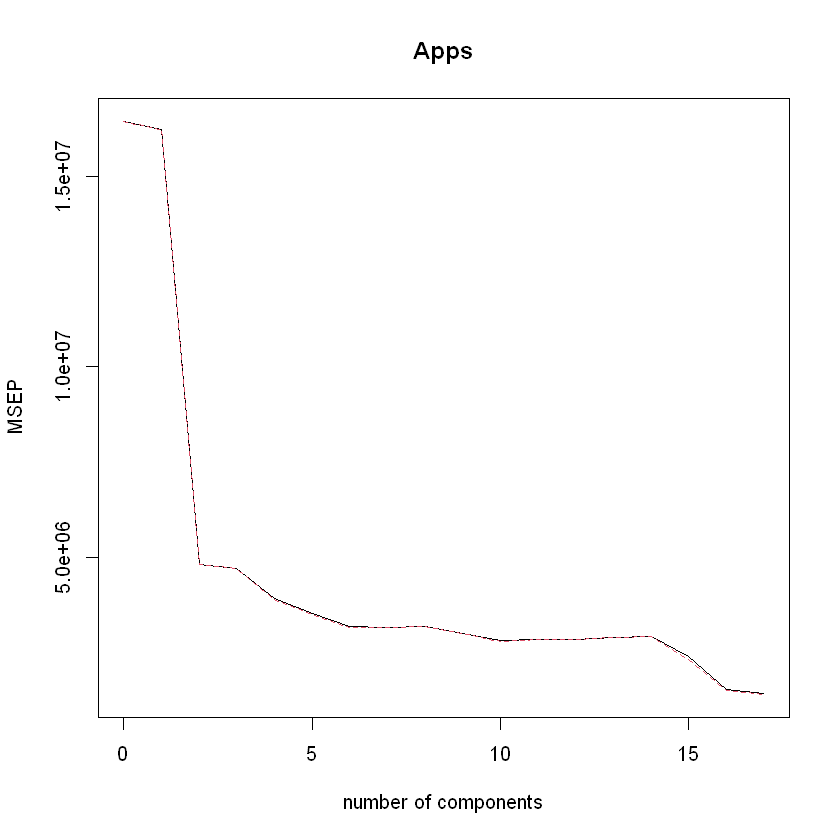

In [42]:
install.packages("pls")
library(pls)
pcr.fit = pcr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [49]:
pcr.pred = predict(pcr.fit, College.test, ncomp=9)
mean((y_test - pcr.pred)^2)

[1] 1388761

### Exercise 9

In [50]:
library(MASS)
attach(Boston)
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


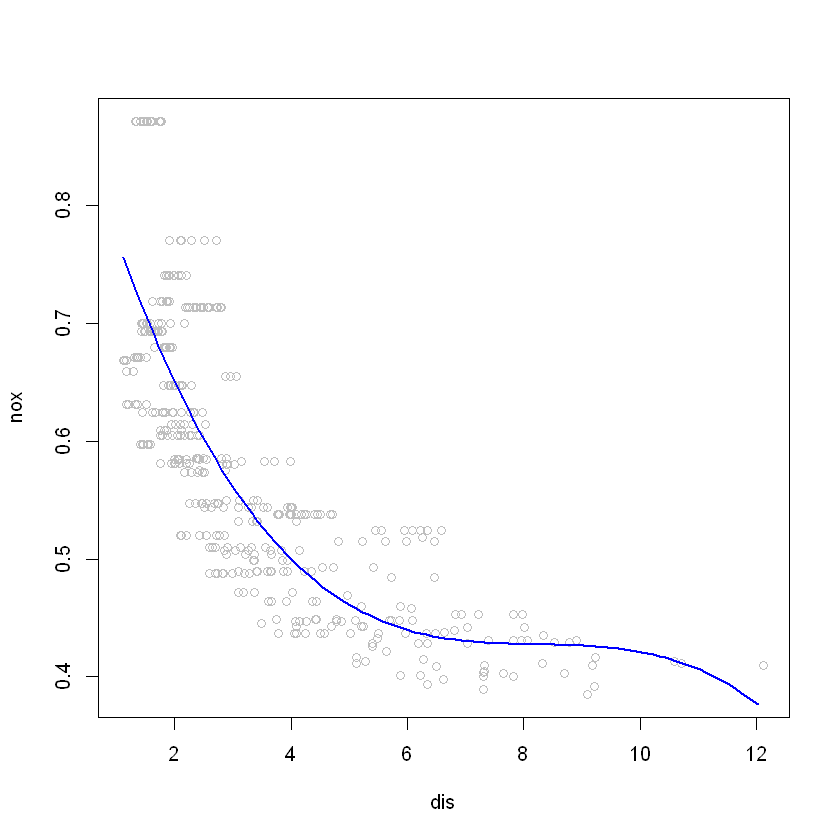

In [51]:
dis.grid = seq(from = range(dis)[1], to = range(dis)[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "grey")
lines(dis.grid, lm.pred, col = "blue", lwd = 2)

In [54]:
rss = rep('null', 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    rss[i] = sum(lm.fit$residuals^2)
}
rss

[1] "2.76856285896928" "2.03526186893526" "1.93410670717907" "1.93298132729859"
 [5] "1.9152899610843"  "1.87825729850816" "1.84948361458298" "1.83562968906769"
 [9] "1.83333080449159" "1.83217112393134"

In [60]:
deltas = rep('null', 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
deltas

[1] "0.00553468759504332" "0.00406869098009107" "0.00388279495112766"
 [4] "0.00389053366208929" "0.00411334437958888" "0.00563295040095729"
 [7] "0.0139865295858569"  "0.00859967919262599" "0.0124048296600035" 
[10] "0.00387924353228933"

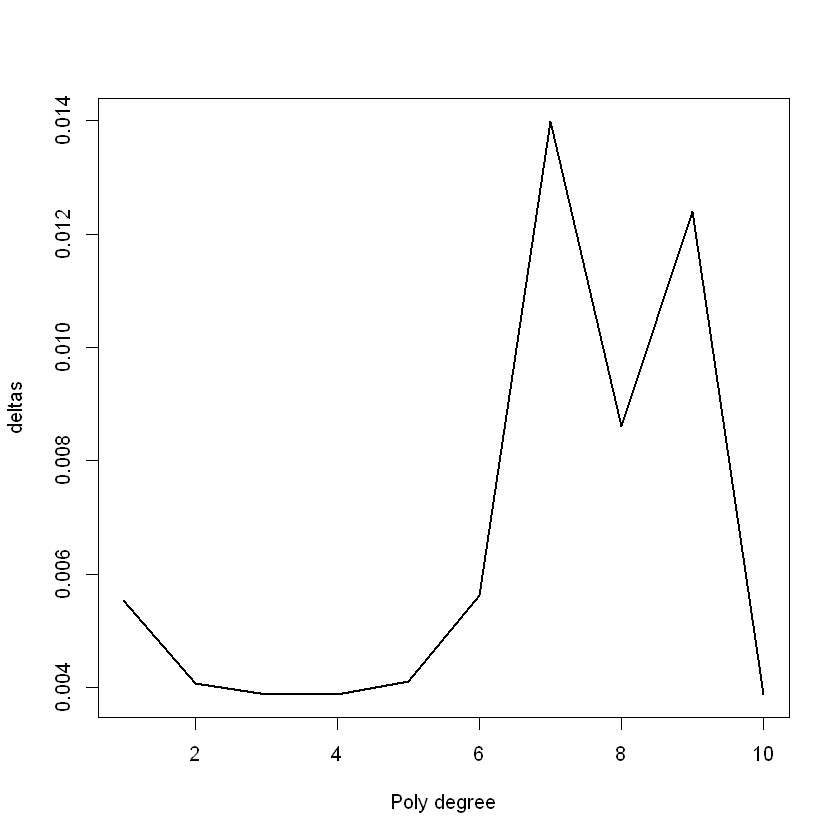

In [64]:
plot(1:10, deltas, xlab = "Poly degree",type = "l", lwd = 2)

### Exercise 10

In [74]:
library(leaps)
reg.fit = regsubsets(Outstate ~ ., data = College.train,method = "forward")
summary(reg.fit)

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College.train, method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       " "       " "       

In [75]:
coefi = coef(reg.fit, id = 6)
names(coefi)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

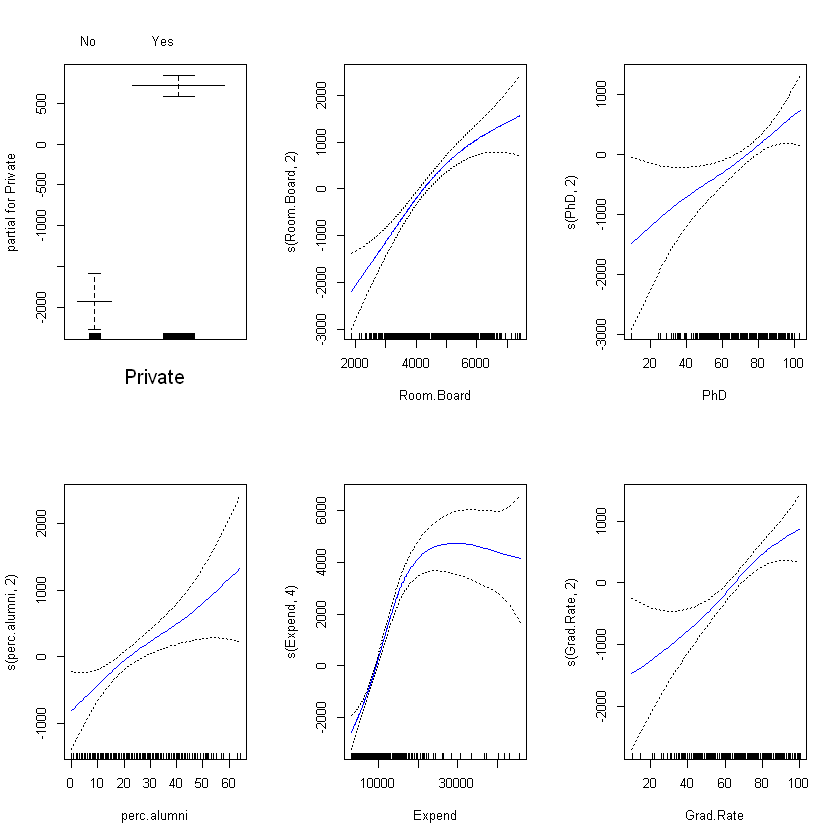

In [80]:
library(gam)
GAM = gam(Outstate ~ Private + s(Room.Board,2) + s(PhD,2) + s(perc.alumni,2) + s(Expend,4) + s(Grad.Rate,2), data = College.train)
par(mfrow = c(2, 3))
plot(GAM, se = T, col = "blue")

In [83]:
gam.pred = predict(GAM, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

[1] 3549132

In [82]:
summary(GAM)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 2) + s(PhD, 
    2) + s(perc.alumni, 2) + s(Expend, 4) + s(Grad.Rate, 2), 
    data = College.train)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-7174.2 -1163.3    30.2  1279.2  4756.5 

(Dispersion Parameter for gaussian family taken to be 3507693)

    Null Deviance: 8263424838 on 517 degrees of freedom
Residual Deviance: 1767878399 on 504.0003 degrees of freedom
AIC: 9292.33 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 2295186724 2295186724 654.329 < 2.2e-16 ***
s(Room.Board, 2)    1 1548871762 1548871762 441.564 < 2.2e-16 ***
s(PhD, 2)           1  592027248  592027248 168.780 < 2.2e-16 ***
s(perc.alumni, 2)   1  276637978  276637978  78.866 < 2.2e-16 ***
s(Expend, 4)        1  762779128  762779128 217.459 < 2.2e-16 ***
s(Grad.Rate, 2)     1   81424416   81424416  23.213 1.922e-06 ***
Residuals   